<a href="https://colab.research.google.com/github/buriro-ezekia/FUTURE_DS_03/blob/main/Buriro_Ezekia_Loan_Approval_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
# Data Preprocessing
# Step 1: Import necessary libraries
import warnings
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Step 2: Load the dataset
# Assuming the dataset is loaded into a pandas dataframe called df
df = pd.read_csv('/content/loan.csv')  # Replace with your actual file path

In [96]:
print(df.head(10))

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   
5  LP001011   Male     Yes          2      Graduate           Yes   
6  LP001013   Male     Yes          0  Not Graduate            No   
7  LP001014   Male     Yes         3+      Graduate            No   
8  LP001018   Male     Yes          2      Graduate            No   
9  LP001020   Male     Yes          1      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000         

In [97]:
# Step 3: Handle Missing Values
# Checking for missing values in the dataset
print("Missing Values Before Preprocessing:\n", df.isnull().sum())






Missing Values Before Preprocessing:
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [98]:
# Fill missing numerical values with the median
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['ApplicantIncome'] = df['ApplicantIncome'].fillna(df['ApplicantIncome'].median())
df['CoapplicantIncome'] = df['CoapplicantIncome'].fillna(df['CoapplicantIncome'].median())

# Fill missing categorical values with the mode
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Education'] = df['Education'].fillna(df['Education'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Property_Area'] = df['Property_Area'].fillna(df['Property_Area'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

# Checking again for missing values after imputation
print("\nMissing Values After Preprocessing:\n", df.isnull().sum())



Missing Values After Preprocessing:
 Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64


In [99]:
# Resolve the remaining missing values in the dataset
# Fill missing values in 'Dependents' (categorical) with the mode
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

# Fill missing values in 'Loan_Amount_Term' (numerical) with the median
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

# Checking again for missing values after imputation
print("\nMissing Values After Preprocessing:\n", df.isnull().sum())



Missing Values After Preprocessing:
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [100]:
# Step 4: Encode Categorical Variables
# We use LabelEncoder to convert categorical columns into numeric values
label_encoder = LabelEncoder()

# Encoding 'Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Married'] = label_encoder.fit_transform(df['Married'])
df['Education'] = label_encoder.fit_transform(df['Education'])
df['Self_Employed'] = label_encoder.fit_transform(df['Self_Employed'])
df['Property_Area'] = label_encoder.fit_transform(df['Property_Area'])

# Encode 'Loan_Status' as 1 for 'Y' (approved) and 0 for 'N' (not approved)
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

print("\nData After Encoding:\n", df.head())


Data After Encoding:
     Loan_ID  Gender  Married Dependents  Education  Self_Employed  \
0  LP001002       1        0          0          0              0   
1  LP001003       1        1          1          0              0   
2  LP001005       1        1          0          0              1   
3  LP001006       1        1          0          1              0   
4  LP001008       1        0          0          0              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Property_Area  Loan_Status  
0             1.0              2            1  
1             1.0              0       

In [46]:
# # Step 4: Encode Categorical Variables
# # We use LabelEncoder to convert categorical columns into numeric values
# label_encoder = LabelEncoder()

# # Encoding 'Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'
# df['Gender'] = label_encoder.fit_transform(df['Gender'])
# df['Married'] = label_encoder.fit_transform(df['Married'])
# df['Education'] = label_encoder.fit_transform(df['Education'])
# df['Self_Employed'] = label_encoder.fit_transform(df['Self_Employed'])
# df['Property_Area'] = label_encoder.fit_transform(df['Property_Area'])

# # Printing data after encoding
# print("\nData After Encoding:\n", df.head())


In [101]:
# Step 5: Feature Scaling (Optional)
# Scaling numerical features using StandardScaler for models that require normalized data.
scaler = StandardScaler()

# Selecting numerical columns for scaling
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Scaling the selected columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("\nData After Scaling:\n", df.head())


Data After Scaling:
     Loan_ID  Gender  Married Dependents  Education  Self_Employed  \
0  LP001002       1        0          0          0              0   
1  LP001003       1        1          1          0              0   
2  LP001005       1        1          0          0              1   
3  LP001006       1        1          0          1              0   
4  LP001008       1        0          0          0              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0         0.072991          -0.554487   -0.211241          0.273231   
1        -0.134412          -0.038732   -0.211241          0.273231   
2        -0.393747          -0.554487   -0.948996          0.273231   
3        -0.462062           0.251980   -0.306435          0.273231   
4         0.097728          -0.554487   -0.056551          0.273231   

   Credit_History  Property_Area  Loan_Status  
0             1.0              2            1  
1             1.0              0        

In [62]:
# Feature Selection using Random Forest Feature Importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assume 'df' is your dataset, and 'Loan_Status' is the target variable

# Encode categorical variables like 'Gender', 'Married', etc.
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Married'] = le.fit_transform(df['Married'])
df['Education'] = le.fit_transform(df['Education'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Dependents'] = le.fit_transform(df['Dependents'])

In [63]:
# Drop the 'Loan_ID' column as it's not relevant for prediction
df = df.drop('Loan_ID', axis=1)  # Assuming 'Loan_ID' is the problematic column

# Define features and target
X = df.drop('Loan_Status', axis=1)  # Features
y = df['Loan_Status']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [64]:
# Train a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [65]:
# Get feature importance scores
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Select the top features based on importance
selected_features = feature_importances[feature_importances > 0.05].index  # Example threshold: 0.05

print("\nSelected Features Based on Importance:\n", selected_features)



Selected Features Based on Importance:
 Index(['Credit_History', 'ApplicantIncome', 'LoanAmount', 'CoapplicantIncome',
       'Loan_Amount_Term', 'Dependents', 'Property_Area'],
      dtype='object')


In [66]:
# Splitting the Data
# Split the data into training and testing sets.
from sklearn.model_selection import train_test_split

# Define the selected features and target variable
selected_features = ['Credit_History', 'ApplicantIncome', 'LoanAmount',
                     'CoapplicantIncome', 'Loan_Amount_Term',
                     'Dependents', 'Property_Area']

# Features (X) and Target (y)
X = df[selected_features]  # Independent variables
y = df['Loan_Status']      # Dependent variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
# Verify the shapes of the splits
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)


Training Features Shape: (491, 7)
Testing Features Shape: (123, 7)
Training Target Shape: (491,)
Testing Target Shape: (123,)


In [69]:
# Solution 1: Handle Missing Values with an Imputer
from sklearn.impute import SimpleImputer

# Impute missing values for numerical and categorical features
imputer = SimpleImputer(strategy="median")  # For numerical columns
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [70]:
# Solution 2: Use Models that Handle NaN Values
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
hist_model = HistGradientBoostingClassifier(random_state=42)

# Train the model
hist_model.fit(X_train, y_train)

# Predict and evaluate
hist_pred = hist_model.predict(X_test)
print("HistGradientBoostingClassifier Model:")
print("Accuracy:", accuracy_score(y_test, hist_pred))
print("Classification Report:\n", classification_report(y_test, hist_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, hist_pred))


HistGradientBoostingClassifier Model:
Accuracy: 0.7560975609756098
Classification Report:
               precision    recall  f1-score   support

           N       0.74      0.47      0.57        43
           Y       0.76      0.91      0.83        80

    accuracy                           0.76       123
   macro avg       0.75      0.69      0.70       123
weighted avg       0.75      0.76      0.74       123

Confusion Matrix:
 [[20 23]
 [ 7 73]]


In [73]:
# Model Training: Train a machine learning model (e.g., Logistic Regression, Decision Tree, or Random Forest).
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize models
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
random_forest_model = RandomForestClassifier(random_state=42)

# Train Logistic Regression
logistic_model.fit(X_train, y_train)
logistic_pred = logistic_model.predict(X_test)

# Train Random Forest
random_forest_model.fit(X_train, y_train)
random_forest_pred = random_forest_model.predict(X_test)


In [82]:
# # Evaluate Logistic Regression
# print("Logistic Regression Model:")
# print("Accuracy:", accuracy_score(y_test, logistic_pred))
# print("Classification Report:\n", classification_report(y_test, logistic_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_test, logistic_pred))

# # Evaluate Random Forest
# print("\nRandom Forest Model:")
# print("Accuracy:", accuracy_score(y_test, random_forest_pred))
# print("Classification Report:\n", classification_report(y_test, random_forest_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_test, random_forest_pred))


Evaluation Metrics for Logistic Regression:
Accuracy: 0.7886
Precision: 0.7596
Recall: 0.9875
F1 Score: 0.8587

Classification Report:
               precision    recall  f1-score   support

           N       0.95      0.42      0.58        43
           Y       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

Confusion Matrix:



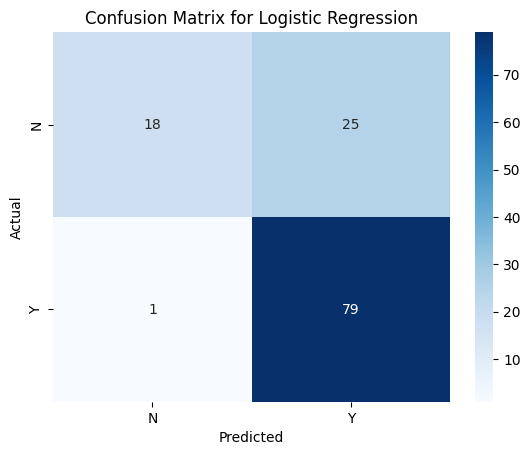


Evaluation Metrics for Random Forest:
Accuracy: 0.7724
Precision: 0.7653
Recall: 0.9375
F1 Score: 0.8427

Classification Report:
               precision    recall  f1-score   support

           N       0.80      0.47      0.59        43
           Y       0.77      0.94      0.84        80

    accuracy                           0.77       123
   macro avg       0.78      0.70      0.72       123
weighted avg       0.78      0.77      0.75       123

Confusion Matrix:



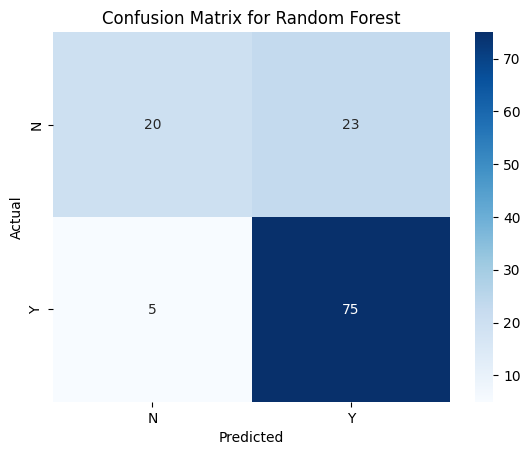

In [102]:
# Model Evaluation
# Evaluate the model's performance using appropriate metrics.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Function to evaluate model performance
def evaluate_model(model_name, y_test, y_pred):
    print(f"\nEvaluation Metrics for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, pos_label='Y'):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, pos_label='Y'):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, pos_label='Y'):.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n")

    # Plotting the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["N", "Y"], yticklabels=["N", "Y"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

# Evaluate Logistic Regression Model
evaluate_model("Logistic Regression", y_test, logistic_pred)

# Evaluate Random Forest Model
evaluate_model("Random Forest", y_test, random_forest_pred)


# Observations
1. Logistic Regression performs slightly better in accuracy but struggles with recall for class N.
2. Random Forest achieves a better balance between precision and recall for both classes, especially improving recall for N.


In [84]:
# Model Tuning: Fine-tune the model to improve performance.
from sklearn.model_selection import RandomizedSearchCV

# Logistic Regression Hyperparameter Tuning (Optimized)
logistic_params = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 500]
}

logistic_random_search = RandomizedSearchCV(
    LogisticRegression(random_state=42),
    param_distributions=logistic_params,
    n_iter=5,  # Number of parameter combinations to try
    scoring='accuracy',
    cv=3,  # 3-fold cross-validation
    verbose=1,
    n_jobs=-1,
    random_state=42
)

logistic_random_search.fit(X_train, y_train)
best_logistic = logistic_random_search.best_estimator_
print("\nBest Parameters for Logistic Regression:", logistic_random_search.best_params_)


Fitting 3 folds for each of 5 candidates, totalling 15 fits

Best Parameters for Logistic Regression: {'solver': 'liblinear', 'max_iter': 500, 'C': 10}


In [85]:
# Random Forest Hyperparameter Tuning (Optimized)
random_forest_params = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

random_forest_random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=random_forest_params,
    n_iter=10,  # Number of parameter combinations to try
    scoring='accuracy',
    cv=3,  # 3-fold cross-validation
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_forest_random_search.fit(X_train, y_train)
best_random_forest = random_forest_random_search.best_estimator_
print("\nBest Parameters for Random Forest:", random_forest_random_search.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits

Best Parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20}



Evaluation Metrics for Tuned Logistic Regression:

Evaluation Metrics for Tuned Logistic Regression:
Accuracy: 0.7886
Precision: 0.7596
Recall: 0.9875
F1 Score: 0.8587

Classification Report:
               precision    recall  f1-score   support

           N       0.95      0.42      0.58        43
           Y       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

Confusion Matrix:



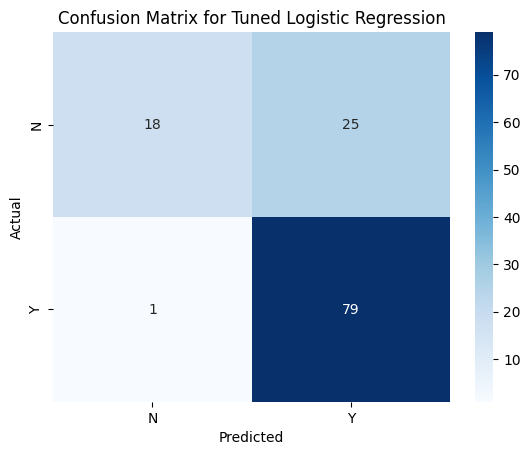


Evaluation Metrics for Tuned Random Forest:

Evaluation Metrics for Tuned Random Forest:
Accuracy: 0.7561
Precision: 0.7500
Recall: 0.9375
F1 Score: 0.8333

Classification Report:
               precision    recall  f1-score   support

           N       0.78      0.42      0.55        43
           Y       0.75      0.94      0.83        80

    accuracy                           0.76       123
   macro avg       0.77      0.68      0.69       123
weighted avg       0.76      0.76      0.73       123

Confusion Matrix:



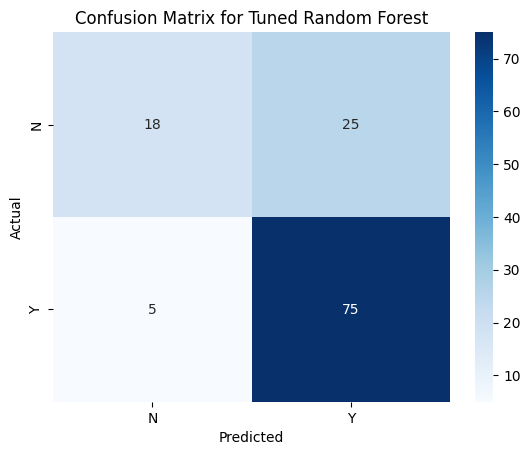

In [103]:
# Evaluate the tuned models on the test set
tuned_logistic_pred = best_logistic.predict(X_test)
tuned_random_forest_pred = best_random_forest.predict(X_test)

print("\nEvaluation Metrics for Tuned Logistic Regression:")
evaluate_model("Tuned Logistic Regression", y_test, tuned_logistic_pred)

print("\nEvaluation Metrics for Tuned Random Forest:")
evaluate_model("Tuned Random Forest", y_test, tuned_random_forest_pred)


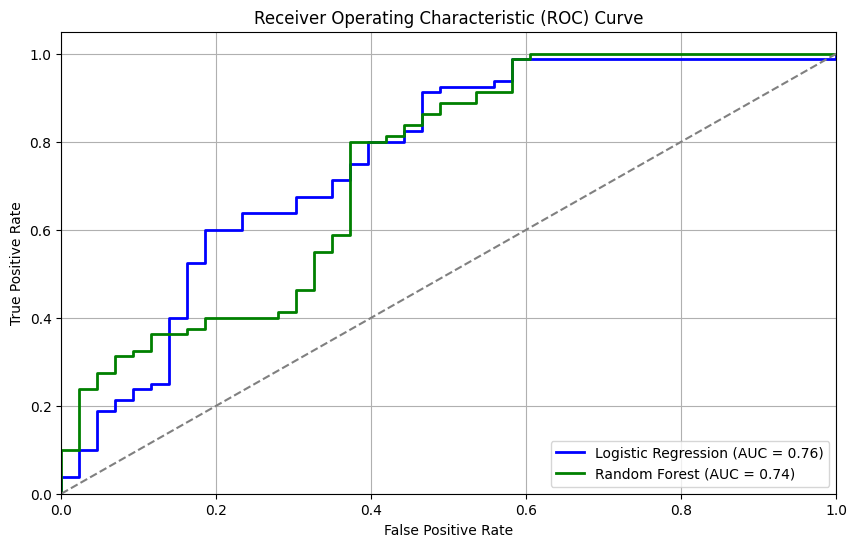

In [94]:
# ROC Curve and AUC
# You may want to explore the ROC curve and AUC scores to get a better understanding of the trade-off between true positives and false positives.
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Convert 'y_test' to numeric values: 'N' -> 0, 'Y' -> 1
y_test_numeric = y_test.map({'N': 0, 'Y': 1})

# Predict probabilities for the positive class (class '1')
logistic_probs = best_logistic.predict_proba(X_test)[:, 1]
random_forest_probs = best_random_forest.predict_proba(X_test)[:, 1]

# Compute ROC curve for both models
logistic_fpr, logistic_tpr, _ = roc_curve(y_test_numeric, logistic_probs)
random_forest_fpr, random_forest_tpr, _ = roc_curve(y_test_numeric, random_forest_probs)

# Compute AUC for both models
logistic_auc = auc(logistic_fpr, logistic_tpr)
random_forest_auc = auc(random_forest_fpr, random_forest_tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))

# Plot for Logistic Regression
plt.plot(logistic_fpr, logistic_tpr, color='blue', lw=2, label=f'Logistic Regression (AUC = {logistic_auc:.2f})')

# Plot for Random Forest
plt.plot(random_forest_fpr, random_forest_tpr, color='green', lw=2, label=f'Random Forest (AUC = {random_forest_auc:.2f})')

# Plot diagonal line (Random classifier)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Set axis limits to fit the graph at the origin
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# # Print AUC scores
# print(f"Logistic Regression AUC: {logistic_auc:.2f}")
# print(f"Random Forest AUC: {random_forest_auc:.2f}")


In [93]:
# Print AUC scores
print(f"Logistic Regression AUC: {logistic_auc:.2f}")
print(f"Random Forest AUC: {random_forest_auc:.2f}")


Logistic Regression AUC: 0.76
Random Forest AUC: 0.74
